In [43]:
! pip install 'cebra[dev,demos]' 

/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: No such file or directory
/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: exec: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: cannot execute: No such file or directory


In [44]:
import sys
import os # my addtion

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from scipy.integrate import solve_ivp
import cebra.datasets
from cebra import CEBRA
import torch
import d_library as dl


## Lorenz Attractor Analysis

In this capsule, we will run a dimension reduction analysis on the lorenz attractor.

In [45]:
# set max iterations
iterations = 2000

In [46]:
# Make a function to build a model, train it and then compute an embedding

def get_embed(input, dimension=3):

    # build CEBRA time model
    model = CEBRA(model_architecture='offset1-model-mse',
                         batch_size=512,
                         learning_rate=0.01,
                         temperature=1,
                         output_dimension = int(dimension),
                         max_iterations=iterations,
                         distance='euclidean',
                         conditional='time',
                         device='cuda_if_available',
                         num_hidden_units=64,
                         verbose=True)

    model.fit(input)
    embedding = model.transform(input)


    return model, embedding


In [47]:
# define a function to make a lorenz system
def lorenz(t, xyz, sigma=10, rho=28, beta=8/3):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = rho * x - y - x * z
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [48]:
# Define parameters and initial conditions
sigma = 10
rho = 28
beta = 8/3
initial_conditions = [0, 2, 0]  # Initial conditions for [x, y, z]

# Time span for integration
t_span = [0, 35]

In [49]:
# Solve the differential equations
solution = solve_ivp(lorenz, t_span, initial_conditions, args=(sigma, rho, beta), dense_output=True)

# Generate time points for plotting
t = np.linspace(t_span[0], t_span[1], 10000)

In [50]:
# Evaluate the solution at the time points
xyz = solution.sol(t)

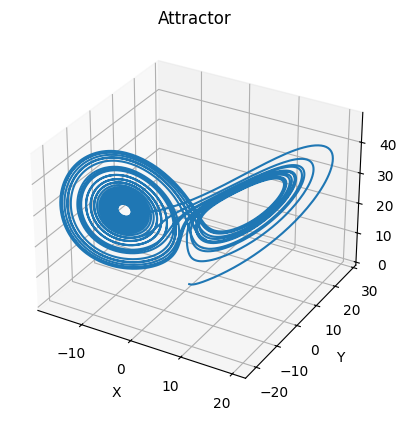

In [51]:
%matplotlib inline
# Plot the Lorenz attractor
def plot_lorenz(coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(coords[0], coords[1], coords[2], alpha=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Attractor')
    plt.show()


plot_lorenz(xyz)

In [52]:
# check the shape of the object
print(xyz.shape)
print(xyz[:,190])

(3, 10000)
[-6.60980422 -8.42031612 26.00175368]


In [53]:
new_lorenz = np.transpose(xyz)

In [54]:
print(new_lorenz.shape)
print(new_lorenz[190])

(10000, 3)
[-6.60980422 -8.42031612 26.00175368]


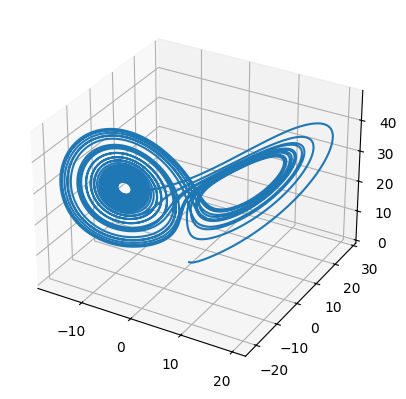

In [55]:
fig_ = plt.figure()
ax_ = fig_.add_subplot(111, projection='3d')
ax_.plot(new_lorenz[:,0], new_lorenz[:,1], new_lorenz[:,2], alpha=1)

In [56]:
# now get embeddings with different output dimensions
model_l1, embed_l1 = get_embed(new_lorenz, dimension=1)
model_l2, embed_l2 = get_embed(new_lorenz, dimension=2)
model_l3, embed_l3 = get_embed(new_lorenz, dimension=3)
model_l4, embed_l4 = get_embed(new_lorenz, dimension=4)
model_l5, embed_l5 = get_embed(new_lorenz, dimension=5)
model_l8, embed_l8 = get_embed(new_lorenz, dimension=8)

pos:  1376888400379904.0000 neg: -1970274371108864.0000 total: -593386037837824.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:20<00:00, 98.75it/s]   
pos:  284496329110668181504.0000 neg: -2646936637791480578048.0000 total: -2362440308680812396544.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:20<00:00, 99.19it/s] 
pos:  3975210297489625186304.0000 neg: -27641887548099969155072.0000 total: -23666677250610343968768.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:19<00:00, 104.66it/s]
pos:  10750826397272635342848.0000 neg: -56844983935824939712512.0000 total: -46094157538552304369664.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:19<00:00, 101.57it/s]
pos:  14078139845169486233600.0000 neg: -81926061685407261655040.0000 total: -67847921840237775421440.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:20<00:00, 98.77it/s]   
pos:  120877190459376416063488.0000 neg: -831843385982569630662656.0000 total: -710966195523193214599168.0000 tem

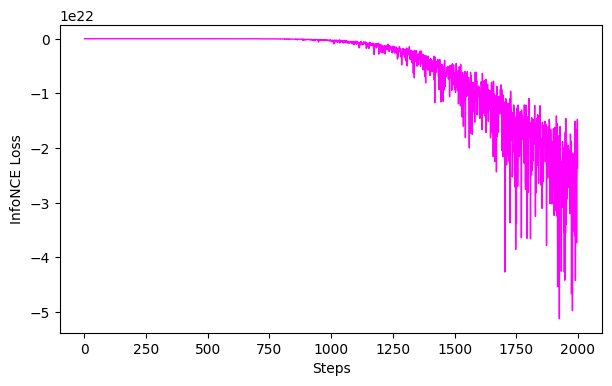

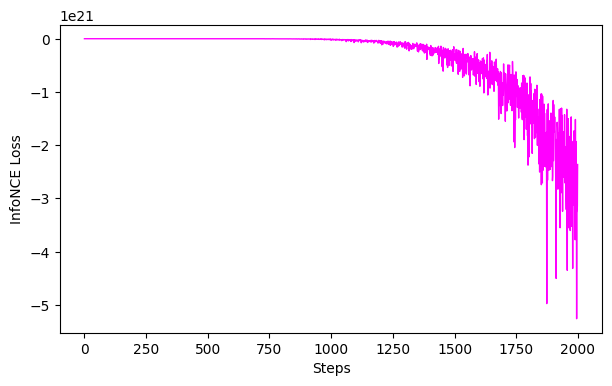

In [57]:
# display the loss of the models during training
ax = cebra.plot_loss(model_l3)
ax1 = cebra.plot_loss(model_l2)

<Axes: title={'center': 'Embedding'}>

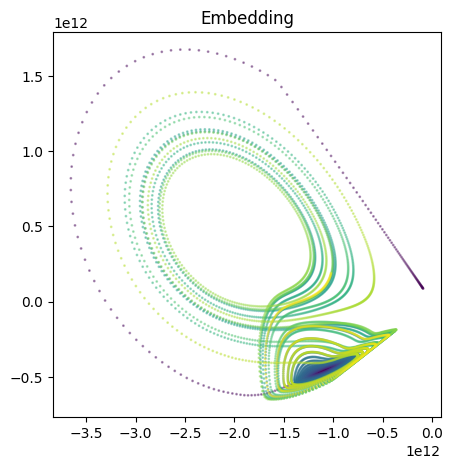

In [58]:
# Let's visualize them
cebra.plot_embedding(embedding=embed_l2, embedding_labels='time', markersize=1)

<Axes3D: title={'center': 'Embedding'}>

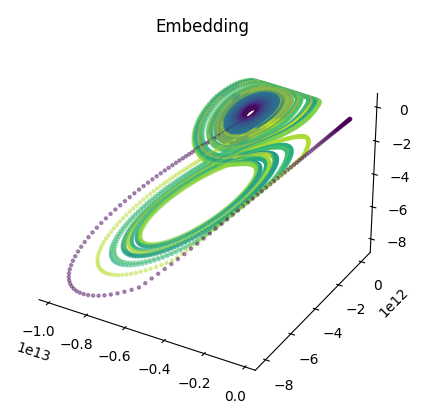

In [59]:
cebra.plot_embedding(embedding=embed_l3, embedding_labels='time', markersize=5)

<Axes3D: title={'center': 'Embedding'}>

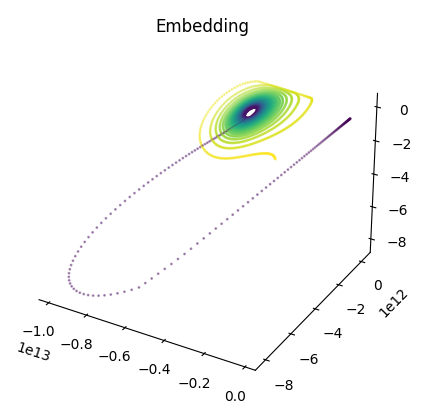

In [61]:
cebra.plot_embedding(embedding=embed_l3[0:5000,:], embedding_labels='time', markersize=1)

In [63]:
lorenz_input = [new_lorenz]

In [66]:
# Create a grid of 2 rows and 3 columns
def embed_attractor(attractor):

   # get embeddings in 2D and 3D
   attractor_input = np.transpose(attractor)
   model_pl2, embed_pl2 = get_embed(attractor_input, dimension=2)
   model_pl3, embed_pl3 = get_embed(attractor_input, dimension=3)

   for i in range(0,attractor.shape[1],1000):

        attractor_p = attractor[:,0:i+1000]

        # define the grid
        gs = gridspec.GridSpec(2, 2, figure=plt.figure(figsize=(10,10)))

        # plot portion of attractor
        ax1 = plt.subplot(gs[0, :], projection='3d')  
        ax1.plot(attractor_p[0], attractor_p[1], attractor_p[2], alpha=1)
        plt.title('Timestep {}'.format(i+1000))

        # plot embeddings
        ax2 = plt.subplot(gs[1,0])
        cebra.plot_embedding(embedding=embed_pl2[0:i+1000,:], embedding_labels='time', markersize=1, ax=ax2, title='2D')
        ax3 = plt.subplot(gs[1,1], projection='3d')
        cebra.plot_embedding(embedding=embed_pl3[0:i+1000,:], embedding_labels='time', markersize=1,ax=ax3, title='3D')
        
        plt.show()


pos:  904929665225783771136.0000 neg: -8726916043081728917504.0000 total: -7821986377855945146368.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:20<00:00, 99.42it/s]   
pos:  5083566431983827419136.0000 neg: -38464172560660092157952.0000 total: -33380606128676264738816.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:20<00:00, 96.74it/s] 


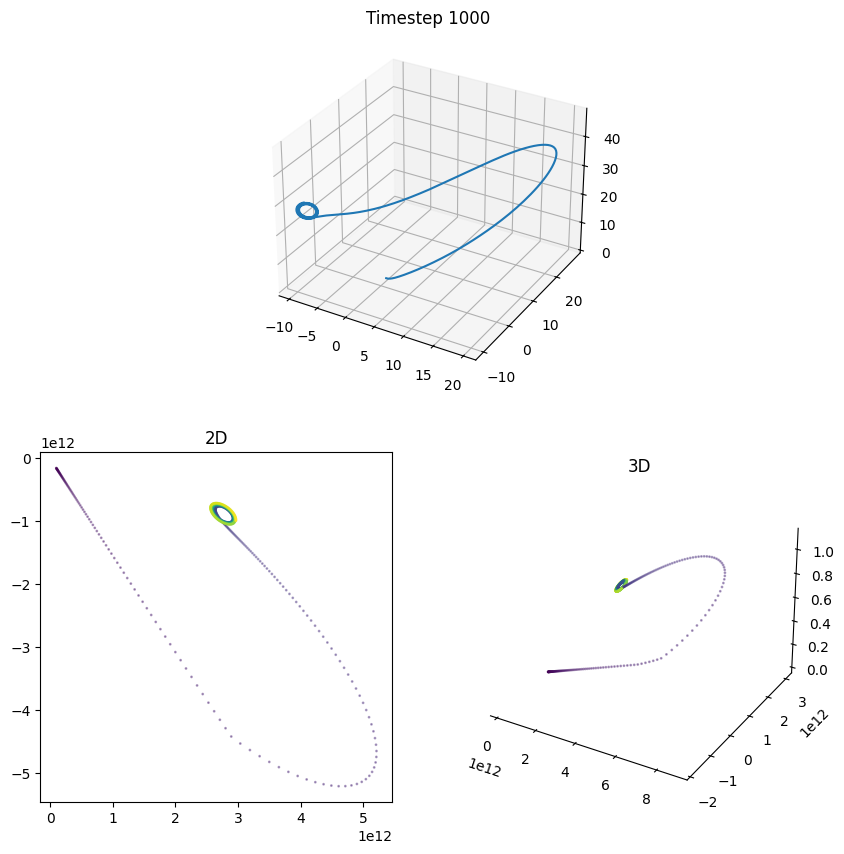

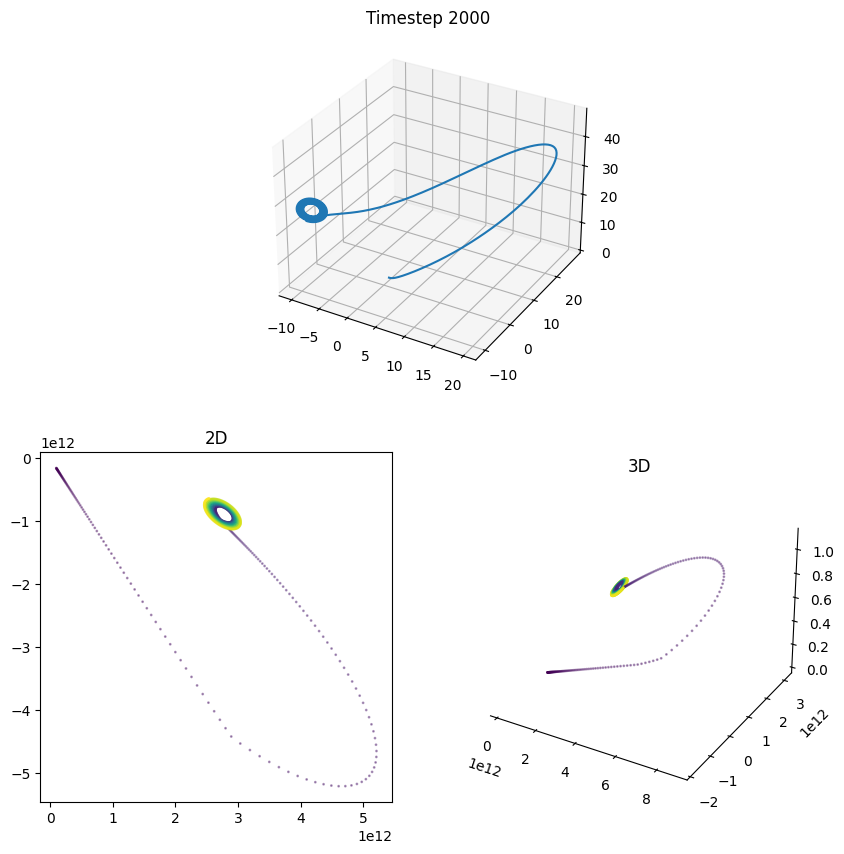

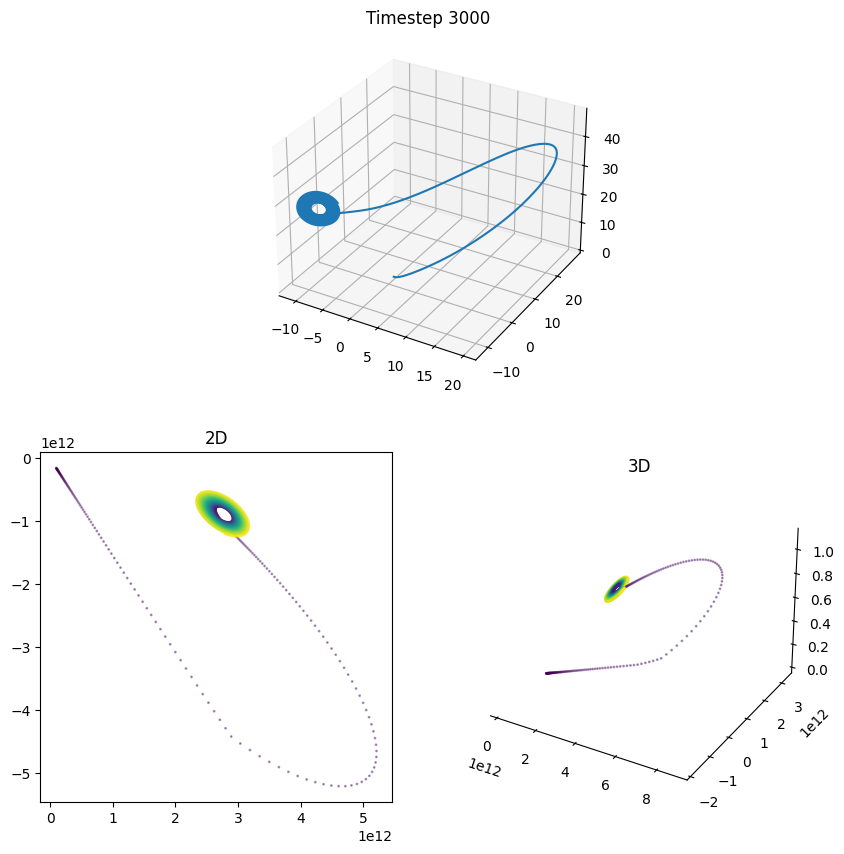

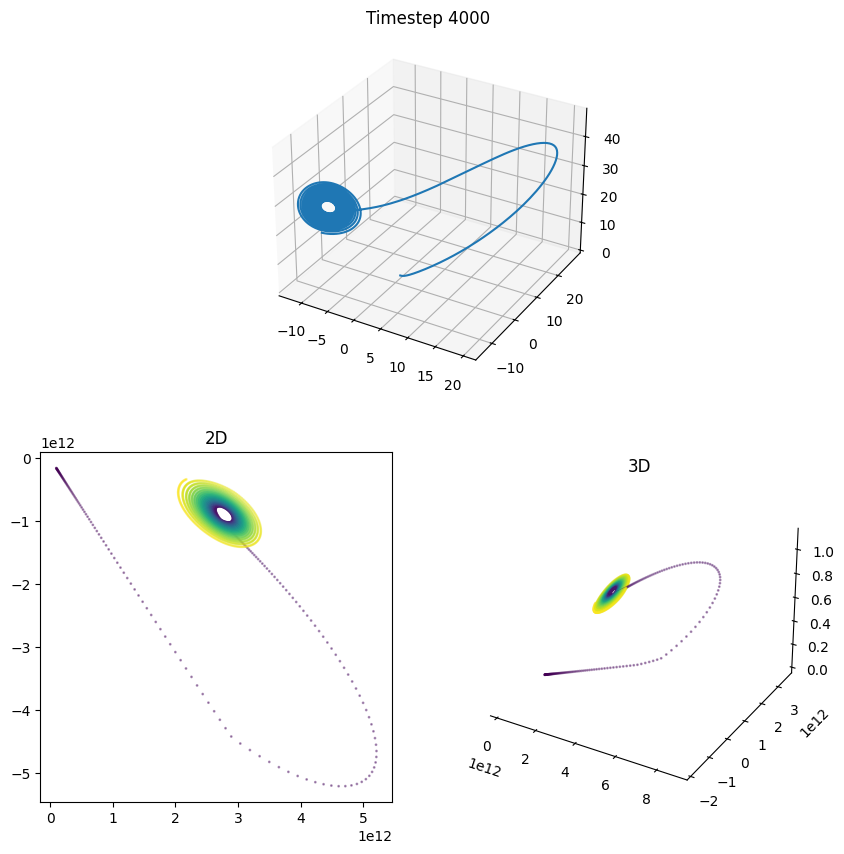

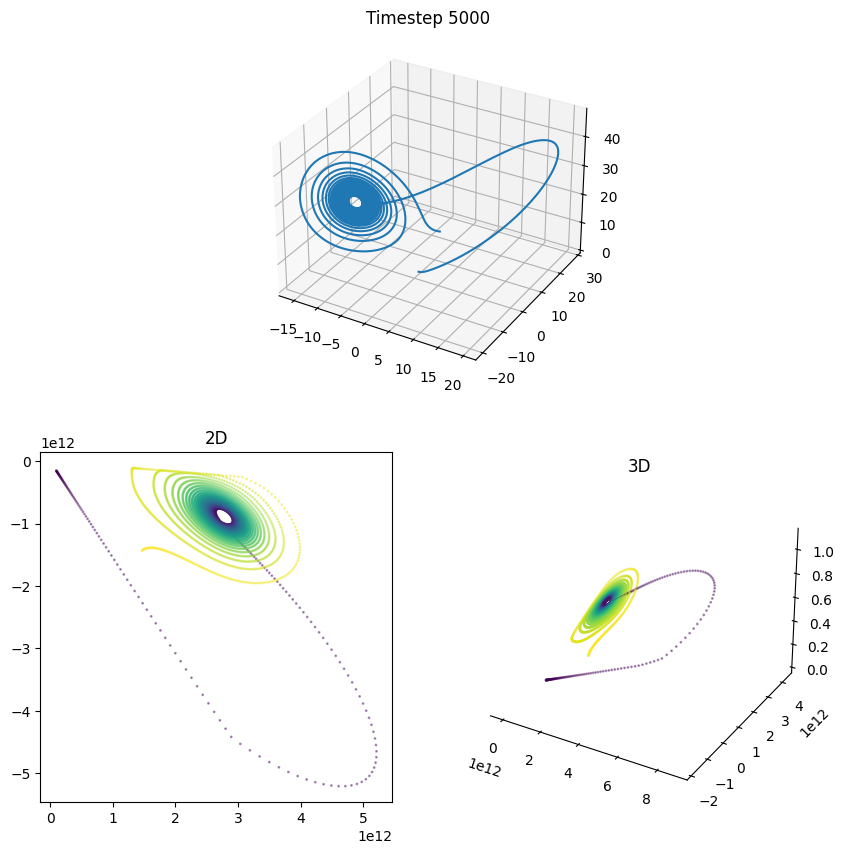

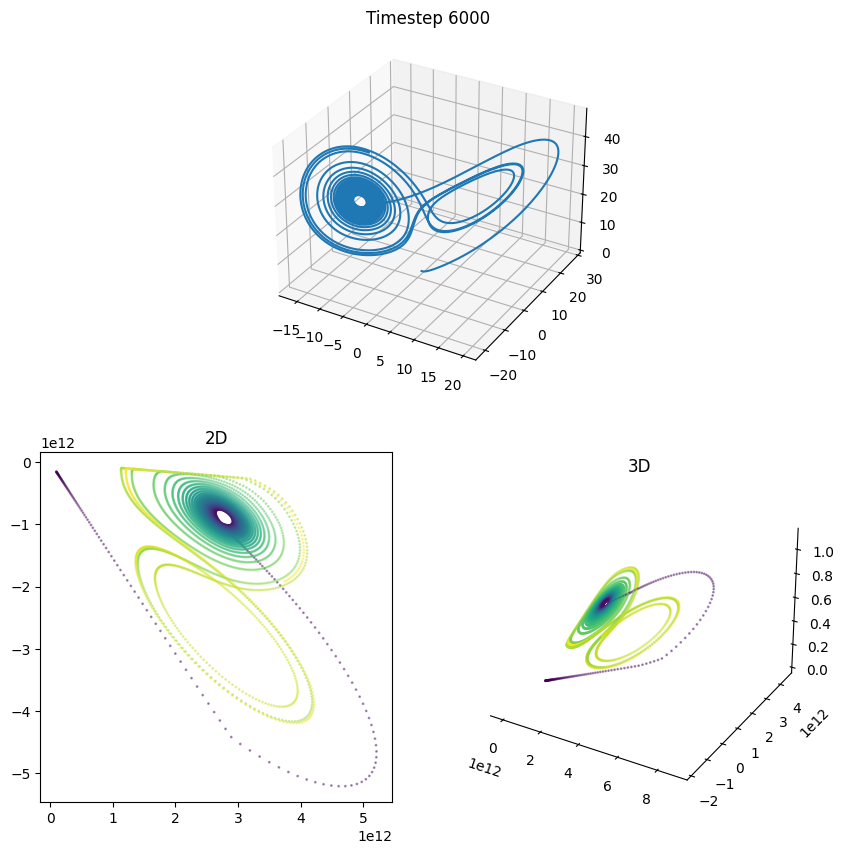

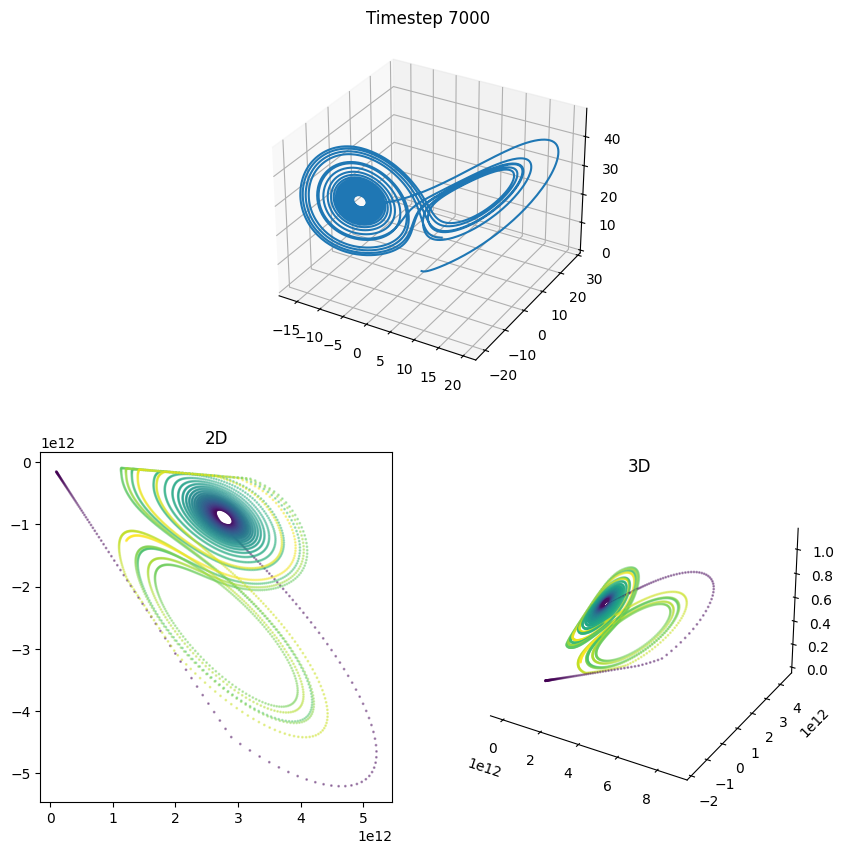

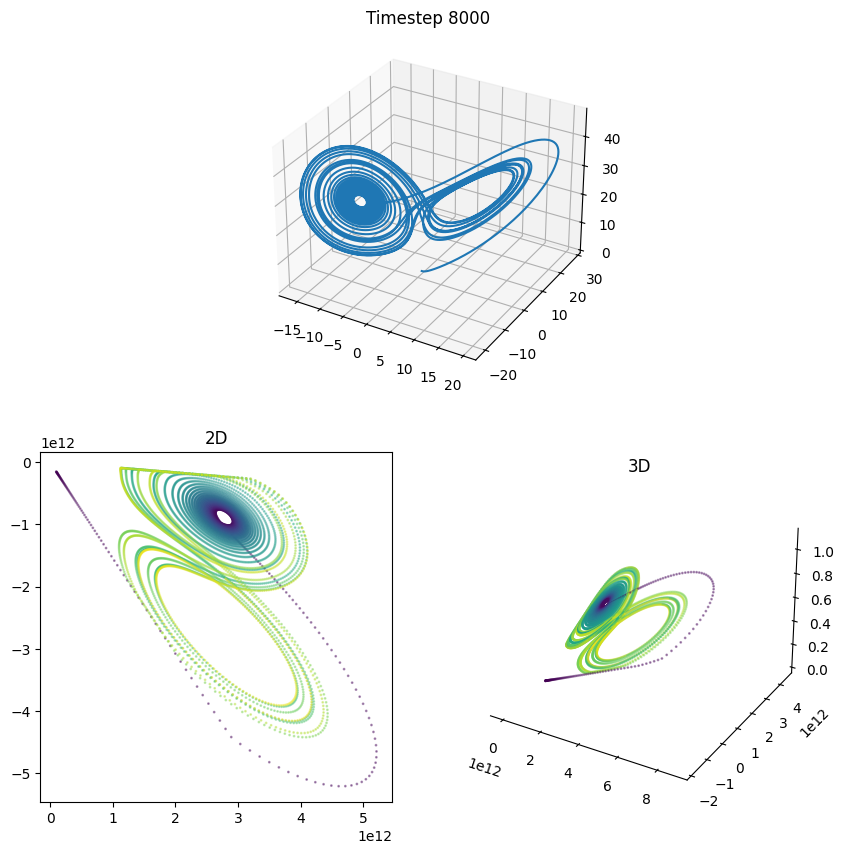

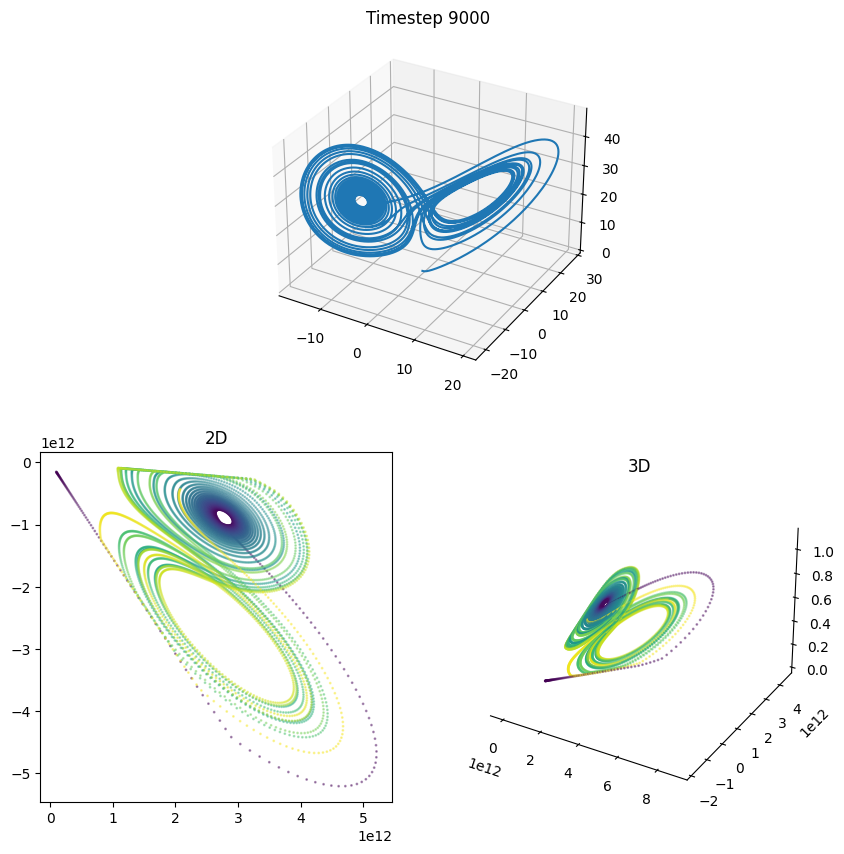

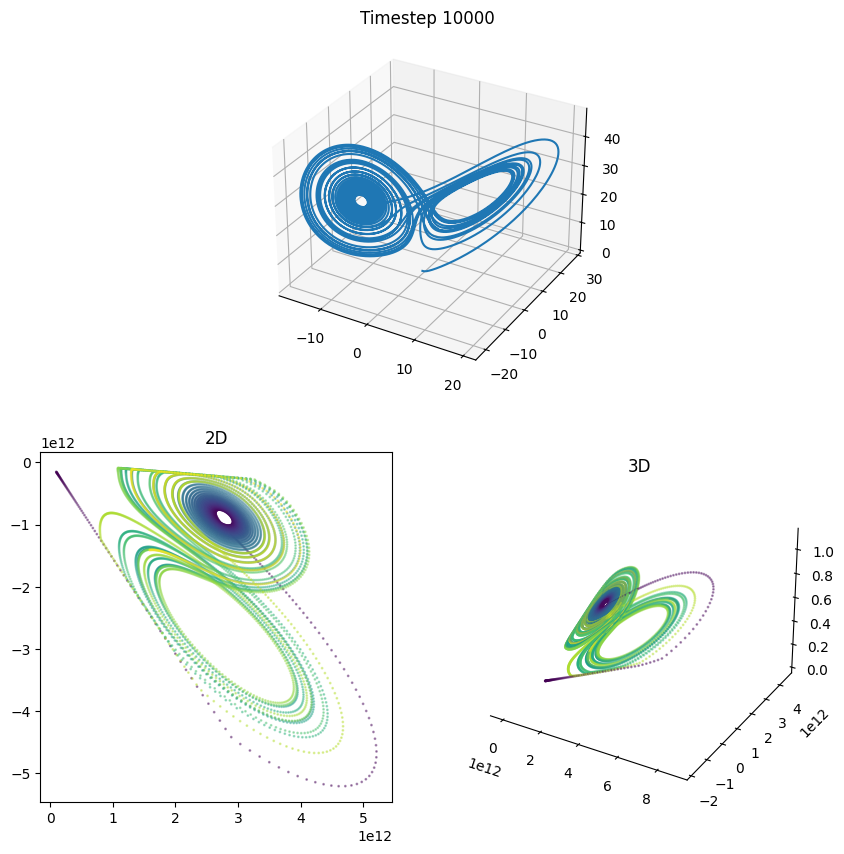

In [67]:
embed_attractor(xyz)

  0%|          | 0/1000 [00:00<?, ?it/s]

pos: -1.0000 neg:  7.2110 total:  6.2110 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 68.47it/s]
pos: -0.9883 neg:  6.6900 total:  5.7017 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 71.20it/s]
pos: -1.0000 neg:  7.2383 total:  6.2383 temperature:  1.0000: 100%|██████████| 1000/1000 [00:13<00:00, 72.55it/s]
pos: -1.0000 neg:  7.2110 total:  6.2110 temperature:  1.0000: 100%|██████████| 1000/1000 [00:13<00:00, 73.37it/s]
pos: -0.9922 neg:  7.1458 total:  6.1536 temperature:  1.0000: 100%|██████████| 1000/1000 [00:13<00:00, 73.66it/s]
pos: -0.9989 neg:  6.4752 total:  5.4763 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 70.03it/s]
pos: -0.9991 neg:  6.4735 total:  5.4744 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 70.16it/s]
pos: -0.9992 neg:  6.4736 total:  5.4744 temperature:  1.0000: 100%|██████████| 1000/1000 [00:13<00:00, 72.48it/s]
pos: -0.9992 neg:  6.4728 total:  5.4736 temperature:  1.0000: 100%|██████████| 

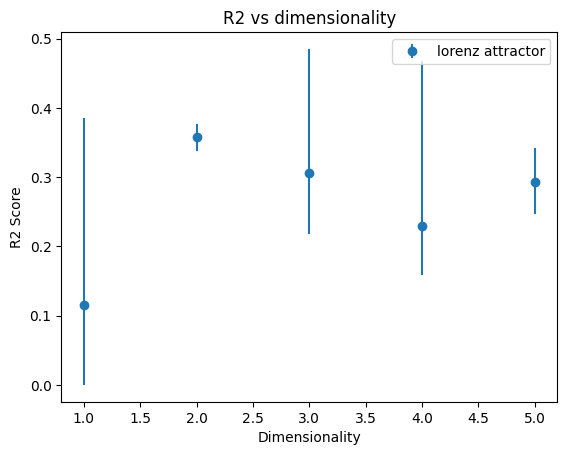

In [68]:
r2_sequence_l = dl.r2_vs_dimension(lorenz_input, dimensionality=[1,2,3,4,5], labels=['lorenz attractor'])